Enter Function Index : 3


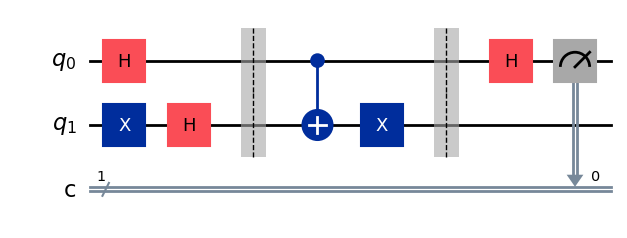

'balanced'

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from IPython.display import display,Latex

def deutcircuit(case : int):
    if case not in [1,2,3,4]:
        raise ValueError("`case` not set valid")
    f = QuantumCircuit(2)
    if case in [2, 3]:
        f.cx(0, 1)
    if case in [3, 4]:
        f.x(1)
    return f

n = int(input("Enter Function Index :"))

def MakeCircuit(func : QuantumCircuit):
    n = func.num_qubits - 1
    qc = QuantumCircuit(n+1,n)
    
    qc.x(n)
    qc.h(range(n+1))
    qc.barrier()
    
    qc.compose(func, inplace = True)
    qc.barrier()
    
    qc.h(range(n))
    qc.measure(range(n),range(n))

    return qc

display(MakeCircuit(deutcircuit(n)).draw(output="mpl"))

def deutalgo(func : QuantumCircuit):
    qc = MakeCircuit(func)
    result = AerSimulator().run(qc,shots =1,memory=True).result()
    measurement = result.get_memory()
    if measurement[0] == "0":
        return "constant"
    return "balanced"
fx = deutcircuit(n)
display(deutalgo(fx))